Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 30, 1, 32)       

19/19 [==============================] - 0s 11ms/step - loss: 0.2618 - accuracy: 0.9849 - val_loss: 0.6274 - val_accuracy: 0.8054
Epoch 45/90
19/19 [==============================] - 0s 11ms/step - loss: 0.2646 - accuracy: 0.9883 - val_loss: 0.6940 - val_accuracy: 0.7584
Epoch 46/90
19/19 [==============================] - 0s 11ms/step - loss: 0.2768 - accuracy: 0.9765 - val_loss: 0.6332 - val_accuracy: 0.8054
Epoch 47/90
19/19 [==============================] - 0s 11ms/step - loss: 0.2630 - accuracy: 0.9866 - val_loss: 0.6106 - val_accuracy: 0.8389
Epoch 48/90
19/19 [==============================] - 0s 11ms/step - loss: 0.2594 - accuracy: 0.9849 - val_loss: 0.6087 - val_accuracy: 0.8255
Epoch 49/90
19/19 [==============================] - 0s 12ms/step - loss: 0.2619 - accuracy: 0.9799 - val_loss: 0.6017 - val_accuracy: 0.8389
Epoch 50/90
19/19 [==============================] - 0s 11ms/step - loss: 0.2394 - accuracy: 0.9933 - val_loss: 0.6056 - val_accuracy: 0.8322
Epoch 51/90
19/19 

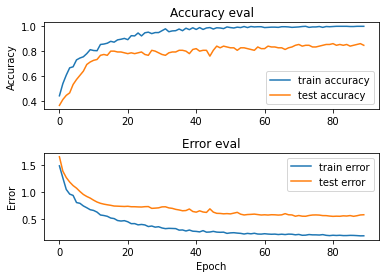

8/8 - 0s - loss: 0.6809 - accuracy: 0.8635

Test accuracy: 0.8634538054466248
Target: Sherpa Nading, Predicted label: Sherpa Nading


In [55]:
import json
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "json_data_test_1.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.subplots_adjust(hspace=.5,wspace=0.4)

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    #model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    #model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    #model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(3, activation='softmax'))
    # where param 3 is number of genre

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction)
    print("Target: {}, Predicted label: {}".format(target_names[y],target_names[predicted_index]))
    
    


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=90)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[7]
    y_to_predict = y_test[7]

    # predict sample
    predict(model, X_to_predict, y_to_predict)




In [56]:
from sklearn.metrics import classification_report

In [54]:
dict_genres = {'Newari':0, 'Sherpa Nading':1, 'Tamang Selo':2  }


reverse_map = {v: k for k, v in dict_genres.items()}
print(reverse_map)
target_names=list(dict_genres.keys())

{0: 'Newari', 1: 'Sherpa Nading', 2: 'Tamang Selo'}


In [57]:
y_test.shape

(249,)

In [58]:

X_test = np.expand_dims(X_test, axis = -1)
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
labels = [0,1,2]
target_names = dict_genres.keys()

print(y_test.shape, pred.shape)
print(classification_report(y_test, pred, target_names=target_names))

(249,) (249,)
               precision    recall  f1-score   support

       Newari       0.88      0.87      0.87        76
Sherpa Nading       0.83      0.80      0.81        74
  Tamang Selo       0.87      0.91      0.89        99

     accuracy                           0.86       249
    macro avg       0.86      0.86      0.86       249
 weighted avg       0.86      0.86      0.86       249



In [59]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))

0.8634538152610441


In [60]:
y_validation.shape

(149,)

In [61]:
X_validation.shape

(149, 130, 13, 1)

In [62]:

y_pred = model.predict(X_validation)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2]
target_names = dict_genres.keys()

print(y_validation.shape, y_pred.shape)
print(classification_report(y_validation, y_pred, target_names=target_names))

(149,) (149,)
               precision    recall  f1-score   support

       Newari       0.89      0.76      0.82        51
Sherpa Nading       0.75      0.87      0.80        47
  Tamang Selo       0.92      0.90      0.91        51

     accuracy                           0.85       149
    macro avg       0.85      0.85      0.85       149
 weighted avg       0.85      0.85      0.85       149



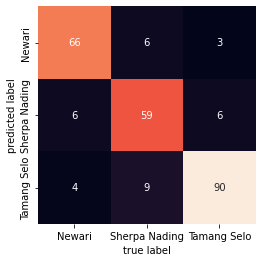

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=dict_genres.keys(),
            yticklabels=dict_genres.keys())
plt.xlabel('true label')
plt.ylabel('predicted label');

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.8634538152610441


In [65]:
print(accuracy_score(y_validation, y_pred))


0.8456375838926175


In [67]:
# save model
model.save("model.h5")

In [24]:
target_names[y_test[2]]

'Newari'